# THỐNG KÊ MÁY TÍNH VÀ ỨNG DỤNG (ĐTTX)

**Khoa Công nghệ Thông tin - ĐH Khoa học Tự nhiên TP. HCM ([fit@hcmus](https://www.fit.hcmus.edu.vn/))**

*Giảng viên: Vũ Quốc Hoàng (vqhoang@fit.hcmus.edu.vn)*

# BÀI 6 - TÓM TẮT DỮ LIỆU VỚI CÁC THỐNG KÊ (Phần 1)

**Nội dung**

* [Giới thiệu](#gioi_thieu)
* [Các thống kê trên biến định tính](#bien_dinh_tinh)
  * [Tần số và tần suất](#tan_suat)
  * [Yếu vị](#yeu_vi)
* [Các thống kê trên biến định lượng](#bien_dinh_luong)
  * [Trung bình](#trung_binh)
  * [Trung vị](#trung_vi)
  * [Phạm vi](#pham_vi)
  * [Phân vị](#phan_vi)
  * [Phương sai và độ lệch chuẩn](#phuong_sai)

**Tài liệu tham khảo**

* Chương 1 [Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruce & Peter Gedeck)](https://www.amazon.com/Practical-Statistics-Data-Scientists-Essential/dp/149207294X)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dữ liệu [`Iris Data Set`](https://archive.ics.uci.edu/ml/datasets/Iris).

In [2]:
iris_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris = pd.read_csv('iris.data', names=iris_names)
iris 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## <a name="gioi_thieu"/>Giới thiệu

Trong **Thống kê Mô tả** (Descriptive Statistics), bên cạnh **trực quan hóa dữ liệu** (data visualization) các **số đo tóm tắt dữ liệu** (summary statistic) cũng hay được dùng để khám phá (explore) và mô tả (describe) dữ liệu. Trong thực hành **phân tích dữ liệu** (data analysis), thống kê mô tả còn được gọi là **phân tích dữ liệu thăm dò** (EDA, Exploratory Data Analysis). 

[NumPy](https://numpy.org/), [pandas](https://pandas.pydata.org/), [SciPy](https://scipy.org/) hỗ trợ đầy đủ việc tính toán các số đo này.

## <a name="bien_dinh_tinh"/>Các thống kê trên biến định tính

Các đặc trưng (feature), thuộc tính (attribute), tính chất (property), đại lượng (quantity) quan tâm trên dữ liệu được gọi chung là các **biến** (variable).

**Biến phân loại** (categorical variable) hay **biến định tính** (qualitative variable) là biến chỉ có hữu hạn (và thường ít) giá trị. Các giá trị còn được gọi là các **mức** (level) hay **nhóm** (group, class). Trường hợp biến 2 mức thường được gọi là biến **nhị phân** (binary). Trường hợp các mức có thứ tự thì biến được gọi là **ordinal**, ngược lại là **nominal**.

Ví dụ: giới tính (nam/nữ) là biến nhị phân, nhóm máu (O/A/B/AB) là biến không thứ tự, học lực (Yếu, Trung Bình, Khá, Giỏi) là biến có thứ tự.

Trong bộ dữ liệu Iris thì biến (cột) `species` là định tính không thứ tự (nominal).

In [3]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### <a name="tan_suat"/>Tần số và tần suất

**Tần số** (frequency) của một nhóm là số lượng dữ liệu thuộc nhóm này. **Tần suất** (relative frequency) hay **tỉ lệ** (proportion) là tỉ số của tần suất trên tổng số dữ liệu.

In [4]:
iris.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
iris.species.value_counts(normalize=True)

species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

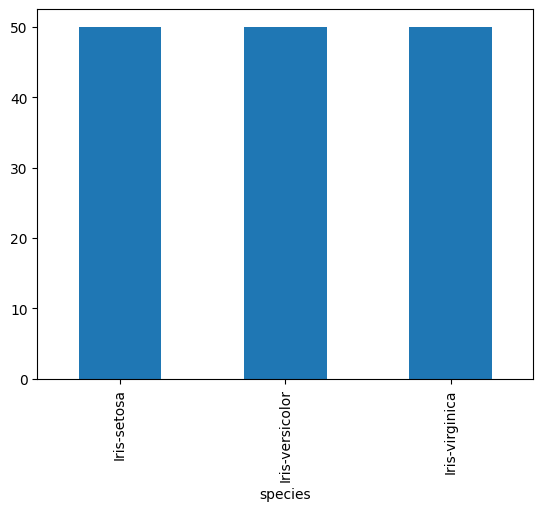

In [6]:
iris.species.value_counts().plot(kind="bar")
plt.show()

### <a name="yeu_vi"/>Yếu vị

**Yếu vị** (mode) là giá trị "phổ biến" nhất của dữ liệu, tức là giá trị có tần số lớn nhất.

Có thể dùng module [`statistics`](https://docs.python.org/3/library/statistics.html#module-statistics) trong thư viện chuẩn của Python để tính mode (cũng như các giá trị tóm tắt khác).

In [7]:
import statistics as st

st.mode(iris.species)

'Iris-setosa'

In [8]:
iris.species.describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: species, dtype: object

Giá trị của các biến số có thể được **phân đoạn** (segment) thành các khoảng (interval, bin) để trở thành biến định tính có thứ tự.

In [9]:
sl_bins = pd.cut(iris.sepal_length, 5)
sl_bins

0       (5.02, 5.74]
1      (4.296, 5.02]
2      (4.296, 5.02]
3      (4.296, 5.02]
4      (4.296, 5.02]
           ...      
145     (6.46, 7.18]
146     (5.74, 6.46]
147     (6.46, 7.18]
148     (5.74, 6.46]
149     (5.74, 6.46]
Name: sepal_length, Length: 150, dtype: category
Categories (5, interval[float64, right]): [(4.296, 5.02] < (5.02, 5.74] < (5.74, 6.46] < (6.46, 7.18] < (7.18, 7.9]]

Bảng tần số.

In [10]:
sl_bins.value_counts(sort=False)

sepal_length
(4.296, 5.02]    32
(5.02, 5.74]     41
(5.74, 6.46]     42
(6.46, 7.18]     24
(7.18, 7.9]      11
Name: count, dtype: int64

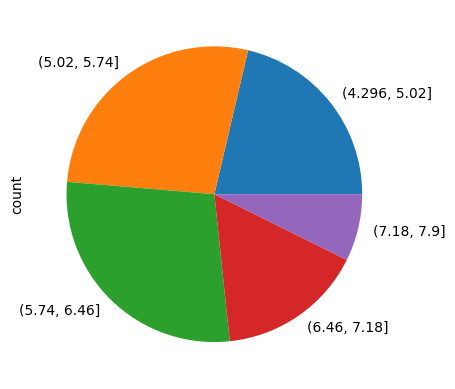

In [11]:
sl_bins.value_counts(sort=False).plot(kind="pie")
plt.show()

In [12]:
st.mode(sl_bins)

Interval(5.74, 6.46, closed='right')

## <a name="bien_dinh_luong"/>Các thống kê trên biến định lượng

**Biến số** (numeric variable) hay **biến định lượng** (quantitative  variable) là các đại lượng có giá trị là số thực (continuous) hay số nguyên (discrete, count).

Trong bộ dữ liệu Iris thì 4 biến (cột) đầu: `sepal_length`, `sepal_width`, `petal_length`, `petal_width` là các biến số thực mô tả các đo lường.

In [13]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### <a name="trung_binh"/>Trung bình

**Trung bình** (mean) là giá trị trung bình cộng của các dữ liệu. Số đo trung bình phản ánh "trọng tâm" của dữ liệu.

In [14]:
np.mean(iris.sepal_length)

5.843333333333334

In [15]:
iris.sepal_length.mean()

5.843333333333334

In [16]:
iris.sepal_length.sum() / iris.sepal_length.size

5.843333333333334

Giá trị trung bình rất "nhạy cảm" với **ngoại lai** (outlier), là các dữ liệu rất lớn hay rất nhỏ so với phần còn lại của dữ liệu. 

In [17]:
x = np.random.rand(50)
x.mean()

0.4658463876320353

In [18]:
x_with_outliers = np.append(x, [10])
x_with_outliers.mean()

0.6527905761098385

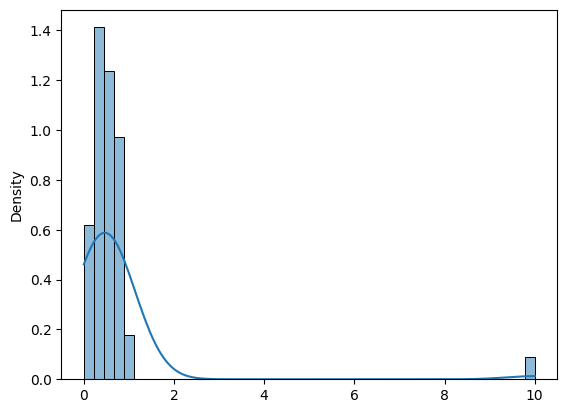

In [19]:
sns.histplot(x_with_outliers, stat="density", kde=True)
plt.show()

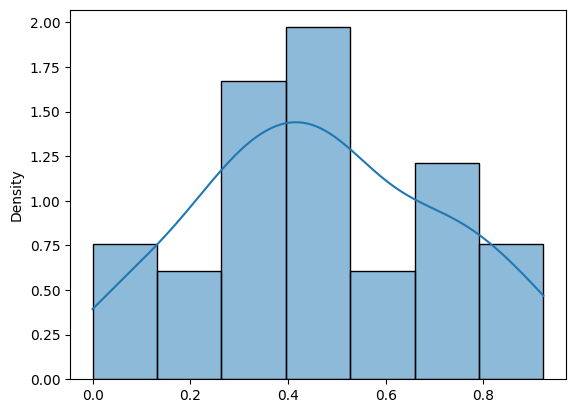

In [20]:
sns.histplot(x, stat="density", kde=True)
plt.show()

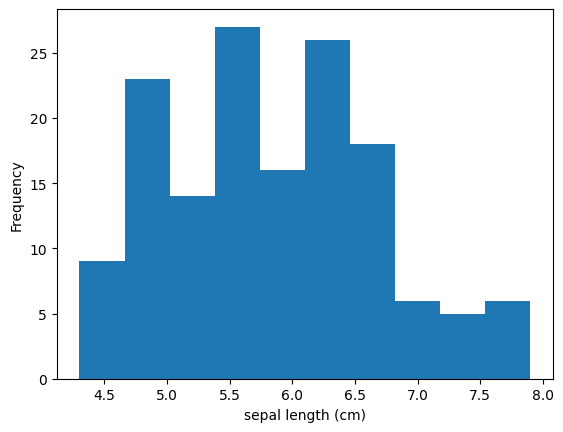

In [21]:
iris.sepal_length.plot.hist()
plt.xlabel("sepal length (cm)")
plt.show()

Histogram có thể được dùng để kiểm tra dữ liệu có ngoại lai hay không. Nếu dữ liệu có ngoại lai thì không nên dùng trung bình.

**Bài tập**. Dùng histogram kiểm tra xem sepal_width, petal_length, petal_width có ngoại lai hay không? Nếu không thì tính trung bình các đặc trưng này.

In [22]:
# TODO:


### <a name="trung_vi"/>Trung vị

**Trung vị** (median) là giá trị "ở giữa" của dữ liệu.

In [23]:
np.median(iris.sepal_length)

5.8

In [24]:
iris.sepal_length.median()

5.8

In [25]:
np.sort(iris.sepal_length)[iris.sepal_length.size // 2]

5.8

Giá trị trung vị có "tính kháng" mạnh các ngoại lai. 

In [26]:
np.median(x)

0.46541773654183055

In [27]:
np.median(x_with_outliers)

0.46656830468788646

Yếu vị (mode) của biến định lượng thường được hiểu là nơi có mật độ cao nhất.

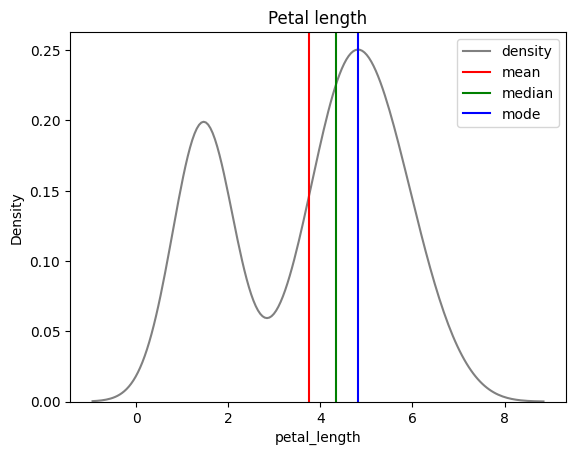

In [28]:
ptlength = iris.petal_length

ax = sns.kdeplot(ptlength, color="gray", label="density")
kde_x, kde_y = ax.get_lines()[0].get_data()

plt.axvline(ptlength.mean(), color="red", label="mean")
plt.axvline(ptlength.median(), color="green", label="median")
plt.axvline(kde_x[np.argmax(kde_y)], color="blue", label="mode")

plt.legend()
plt.title("Petal length")
plt.show()

**Bài tập**. Tính trung vị của các đặc trưng trong bộ dữ liệu Iris và so sánh với trung bình.

In [29]:
# TODO:


Xem thêm các "số đo trung tâm" của dữ liệu tại Wikipedia: [Central tendency](https://en.wikipedia.org/wiki/Central_tendency).

### <a name="pham_vi"/>Phạm vi

**Phạm vi** (range) cho thấy "độ rộng" của dữ liệu.

In [30]:
iris.sepal_length.max() - iris.sepal_length.min()

3.6000000000000005

Giá trị phạm vi rất "nhạy cảm" với ngoại lai.

In [31]:
np.max(x) - np.min(x)

0.9229839390790346

In [32]:
np.max(x_with_outliers) - np.min(x_with_outliers)

9.99998138386619

### <a name="phan_vi"/>Phân vị

Các **tứ phân vị** (quartile) là các giá trị chia các nhóm 1/4 của dữ liệu (sau khi sắp tăng dần).

In [33]:
np.percentile(iris.sepal_length, [25, 50, 75])

array([5.1, 5.8, 6.4])

In [34]:
iris.sepal_length.quantile([0.25, 0.50, 0.75])

0.25    5.1
0.50    5.8
0.75    6.4
Name: sepal_length, dtype: float64

**Khoảng tứ phân vị** (interquartile range, IQR) là khoảng cách giữa **tứ phân vị trên** (upper quartile) và **tứ phân vị dưới** (lower quartile).

In [35]:
lower_quartile, upper_quartile = np.percentile(iris.sepal_length, [25, 75])
IQR = upper_quartile - lower_quartile
IQR

1.3000000000000007

Khoảng tứ phân vị có "tính kháng" mạnh các ngoại lai. 

**Biểu đồ hộp** (boxplot) mô tả dữ liệu theo các tứ phân vị

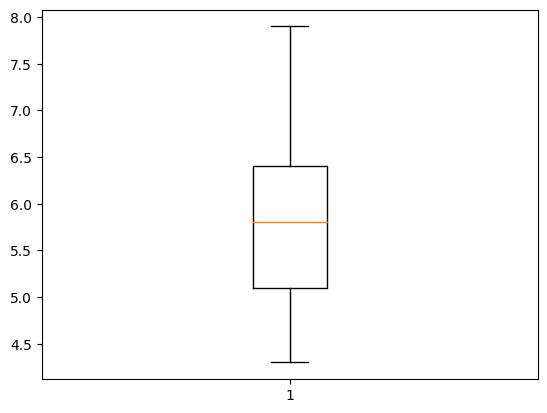

In [36]:
plt.boxplot(iris.sepal_length)
plt.show()

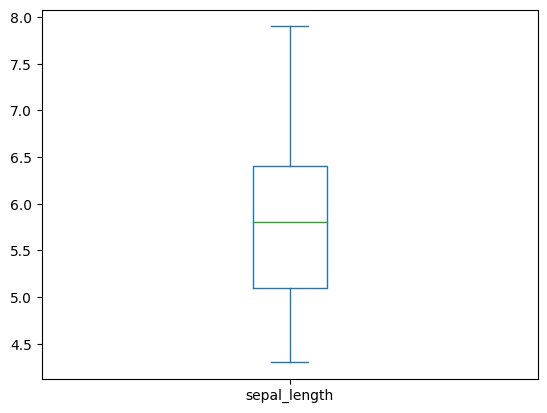

In [37]:
iris.sepal_length.plot.box()
plt.show()

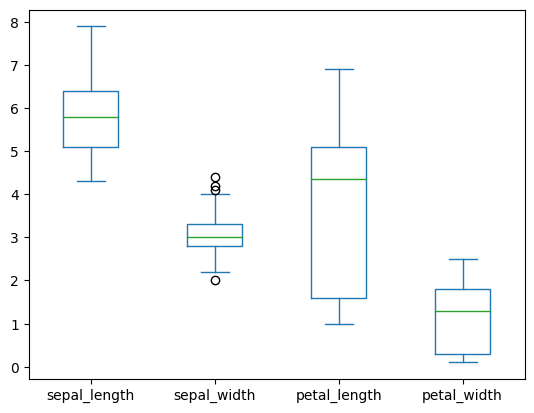

In [38]:
iris.plot.box()
plt.show()

Biểu đồ hộp cũng cho thấy các điểm dữ liệu "được cho là" ngoại lai (hiển thị bởi các chấm tròn).

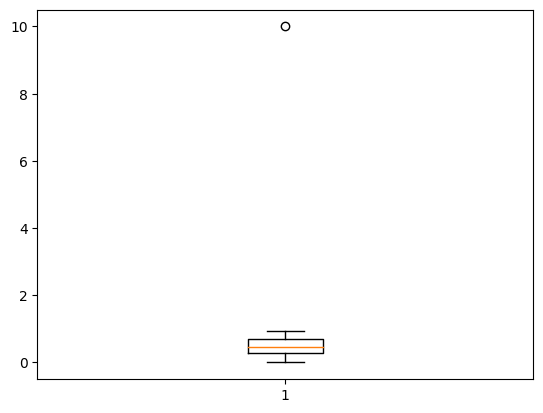

In [39]:
plt.boxplot(x_with_outliers)
plt.show()

Tổng quát, ta có thể dùng **phân vị** (quantile, percentile) là điểm chia dữ liệu theo phần trăm.

In [40]:
np.percentile(iris.sepal_length, [5, 95])

array([4.6  , 7.255])

In [41]:
iris.sepal_length.quantile([0.05, 0.95])

0.05    4.600
0.95    7.255
Name: sepal_length, dtype: float64

**Bài tập**. Vẽ riêng boxplot cho sepal_width để thấy rõ các ngoại lai.

In [42]:
# TODO:


### <a name="phuong_sai"/>Phương sai và độ lệch chuẩn

**Phương sai** (variance) và **độ lệch chuẩn** (standard deviation) là các giá trị hay dùng nhất để đo "độ biến động" của dữ liệu.

In [43]:
spl = iris.sepal_length

mean = sum(spl) / len(spl)
sum_square_deviation = sum((x - mean)**2 for x in spl)
var = sum_square_deviation / len(spl)
std = var ** 0.5

print(var, std)

0.6811222222222222 0.8253012917851409


In [44]:
print(np.var(spl), np.std(spl))
print(spl.var(), spl.std())
print(spl.var(ddof=0), spl.std(ddof=0))

0.6811222222222223 0.8253012917851409
0.6856935123042507 0.828066127977863
0.6811222222222223 0.8253012917851409


Xem thêm các "số đo phân tán" của dữ liệu tại Wikipedia: [Statistical dispersion](https://en.wikipedia.org/wiki/Statistical_dispersion).

Tổng kết, các giá trị trung bình, trung vị, tứ phân vị dưới, tứ phân vị trên và độ lệch chuẩn là các con số hay dùng để "tóm tắt" dữ liệu định lượng.

In [45]:
iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [46]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
